# Performance evaluation of Apriori algorithm available in three popular open-source pattern mining libraries (PAMI, MLxtend, and efficient-Apriori)

Apriori is a popular algorithm to discover frequent patterns in a transactional database. This algorithm is available in three open-source python libraries, namely PAMI, MLxtend, and efficient-apriori.


In this experiment, we evaluate and show that Apriori algorithm available in PAMI is faster than those available in MLxtend and efficient-Apriori.

# **Setup**

## Installation of packages

In [1]:
!pip3 install PAMI mlxtend efficient_apriori

Defaulting to user installation because normal site-packages is not writeable


### Create dataframes to store results

In [2]:
import pandas as pd

result1 = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
result2 = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
result3 = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])

# Experiment 1: Evaluation on the synthetic T10I4D100K dataset

## Step 1.1: Download the T10I4D100K database

In [3]:
!wget "https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_retail.csv"

--2024-06-13 22:27:10--  https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_retail.csv
Resolving u-aizu.ac.jp (u-aizu.ac.jp)... 150.95.161.176, 150.31.244.160
Connecting to u-aizu.ac.jp (u-aizu.ac.jp)|150.95.161.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4165546 (4.0M) [text/csv]
Saving to: ‘Transactional_retail.csv.4’

Transactional_retai 100%[===================>]   3.97M  18.2MB/s    in 0.2s    

2024-06-13 22:27:10 (18.2 MB/s) - ‘Transactional_retail.csv.4’ saved [4165546/4165546]



## Step 1.2: Specify the input parameters

In [4]:
inputFile = "Transactional_retail.csv"
minimumSupportCountList = [600,700,800,900,1000]
seperator = "\t"

## Step 1.3: Executing the Apriori algorithm

### Step 1.3.1: Using PAMI Package

In [5]:
import PAMI.frequentPattern.basic.Apriori as alg
#import Apriori as alg

for minSupCount in minimumSupportCountList:
  obj = alg.Apriori(inputFile, minSup=minSupCount, sep=seperator)
  obj.mine()
  result1.loc[result1.shape[0]] = ['PAMI-Apriori', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
  del obj

Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 


### Step 1.3.2: Using Mlxtend package

In [6]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import time
import psutil
import warnings

for min_sup in minimumSupportCountList:
    start_time = time.time()

    df = pd.read_csv(inputFile, header=None)

    preprocessed_data = []
    for transaction in df[0]:
        items = transaction.split('\t')
        preprocessed_data.append(items)

    te = TransactionEncoder()
    te_ary = te.fit_transform(preprocessed_data)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(df_encoded, min_support=min_sup / len(preprocessed_data), use_colnames=True, low_memory=True)
    end_time = time.time()

    runtime = end_time - start_time
    memory = psutil.Process().memory_info().rss
    print(f"Frequent patterns were generated successfully using Apriori algorithm")

    result2.loc[result2.shape[0]] = ['mlxtend-Apriori', min_sup, len(frequent_itemsets), runtime, memory]


Frequent patterns were generated successfully using Apriori algorithm
Frequent patterns were generated successfully using Apriori algorithm
Frequent patterns were generated successfully using Apriori algorithm
Frequent patterns were generated successfully using Apriori algorithm
Frequent patterns were generated successfully using Apriori algorithm


### Step 1.3.3: Using the efficient-Apriori package

In [7]:
from efficient_apriori import apriori as apriori_efficient
import time
import os
import psutil

for minSupCount in minimumSupportCountList:
    start_time = time.time()
    fd = []
    with open(inputFile, 'r') as f:
        for line in f:
            fd.append(tuple(line.strip().split('\t')))
    itemsets, rules = apriori_efficient(fd, min_support=minSupCount / len(fd), min_confidence=1, max_length=50)
    end_time = time.time()

    runtime = end_time - start_time
    memory = psutil.Process().memory_info().rss
    print(f"Frequent patterns were generated successfully using Efficient Apriori algorithm")

    patterns = 0
    for itemset in itemsets:
        patterns += len(itemsets[itemset])

    result3.loc[result3.shape[0]] = ['EfficientApriori', minSupCount, patterns, runtime, memory]



Frequent patterns were generated successfully using Efficient Apriori algorithm
Frequent patterns were generated successfully using Efficient Apriori algorithm
Frequent patterns were generated successfully using Efficient Apriori algorithm
Frequent patterns were generated successfully using Efficient Apriori algorithm
Frequent patterns were generated successfully using Efficient Apriori algorithm


## Step 1.4: Visualizing the results

We now visualize the performance of Apriori algorithm available in three open-source libraries based on the number of patterns extracted, memory usage, and runtime requirements.

### Step 1.4.1: Number of frequent patterns generated at different minimum support values

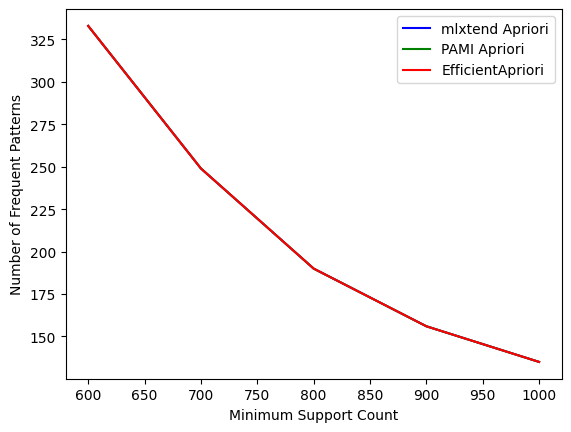

In [8]:
import matplotlib.pyplot as plt

for result, color, label in zip([result1, result2, result3], ['blue', 'green', 'red'], ['mlxtend Apriori', 'PAMI Apriori', 'EfficientApriori']):
    plt.plot(result['minSup'], result['patterns'], label=label, color=color)
plt.xlabel('Minimum Support Count')
plt.ylabel('Number of Frequent Patterns')
plt.legend()
plt.show()


__Observations__
1. The increase in minimum support has resulted in reduced number of frequent patterns. It is because many patterns failed to satisfy the increased minimum support to be a frequent pattern.
2. The count of generated patterns is the same for different Python libraries implementing the Apriori algorithm. This proves the correctness of the PAMI Apriori Algorithm.

### Step 1.4.2: Runtime requirements of the Apriori algorithm across different Python libraries.

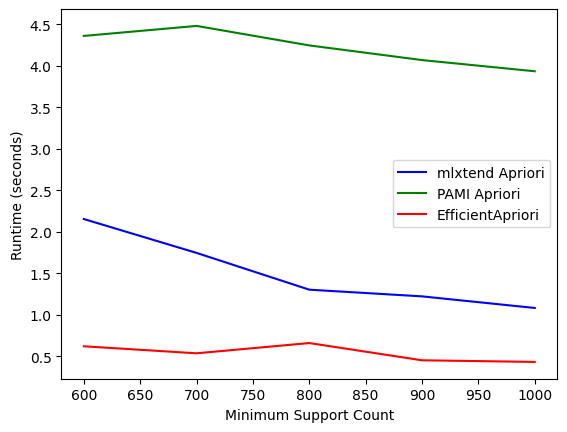

In [9]:
import matplotlib.pyplot as plt

for result, color, label in zip([result1, result2, result3], ['blue', 'green', 'red'], ['mlxtend Apriori', 'PAMI Apriori', 'EfficientApriori']):
    plt.plot(result['minSup'], result['runtime'], label=label, color=color)
plt.xlabel('Minimum Support Count')
plt.ylabel('Runtime (seconds)')
plt.legend()
plt.show()


__Observations__
1. The runtime taken by the generated patterns decreases as the minSup value increases.
2. The runtime of PAMI Apriori yields the best results when compared to mlxtend and efficient_apriori.

### Step 1.4.3: Memory consumption of the Apriori algorithm across different Python libraries.

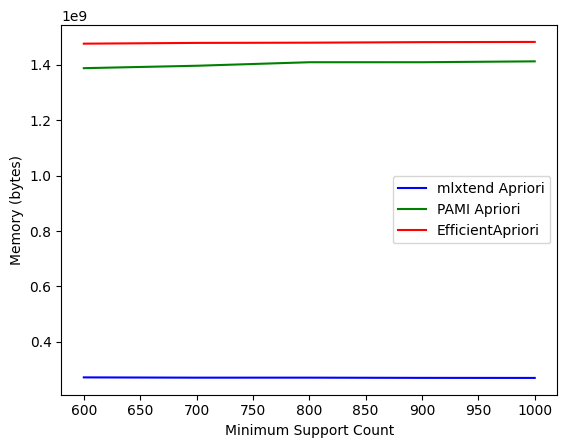

In [10]:
import matplotlib.pyplot as plt

for result, color, label in zip([result1, result2, result3], ['blue', 'green', 'red'], ['mlxtend Apriori', 'PAMI Apriori', 'EfficientApriori']):
    plt.plot(result['minSup'], result['memory'], label=label, color=color)
plt.xlabel('Minimum Support Count')
plt.ylabel('Memory (bytes)')
plt.legend()
plt.show()


__Observations__
1. The memory consumption varies among three different libraries for the Apriori algorithm. The following observations are made
    - The memory usage in EfficientApriori initially sees a slight increase between minSup values of 600 to 900, followed by a steep increase beyond 900.
    - In mlxtend, the graph shows a slight decrease in memory consumption with an increase in the minSup value.
    - In the PAMI version of Apriori, the graph shows a slight increase from minSup values of 600 to 700, followed by a steep decrease for the remaining minSup values.